In [1]:
import numpy as np
import pandas as pd
import time

from matplotlib import pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.kmeans import kmeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import kmeans_plusplus
from sklearn.metrics import adjusted_rand_score
from pandas import crosstab

In [2]:
iris = load_iris()
data = iris.data

X = iris['data']
y = iris['target']

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

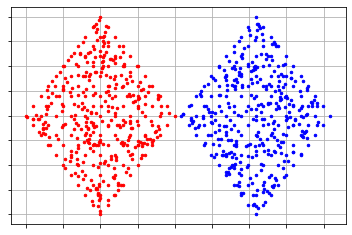

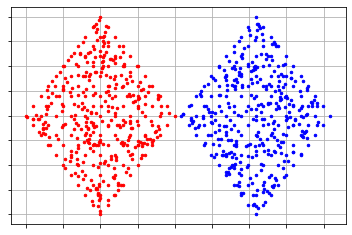

In [6]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
# Load list of points for cluster analysis.
sample = read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS)
# Set random initial medoids.
initial_medoids = [1, 500]
# Create instance of K-Medoids algorithm.
kmedoids_instance = kmedoids(sample, initial_medoids)
# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
# Show allocated clusters.
print(clusters)
# Display clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()

In [5]:
def transfer_to_index_list(index_lists):
    # 初始化字典
    index_to_value = {}

    # 填充字典
    for group_idx, indexes in enumerate(index_lists):
        for index in indexes:
            index_to_value[index] = group_idx

    # 确定列表的最大长度（最大索引加1）
    max_index = max(index_to_value.keys()) + 1

    # 创建列表并填充
    result_list = [None] * max_index
    for index, value in index_to_value.items():
        result_list[index] = value

    # 由于result_list可能包含None，我们将未指定的值设置为-1，表示不在任何子列表中
    return [-1 if x is None else x for x in result_list]

running time: 0.37654566764831543s
adjusted_rand_score: 0.7455038681804481


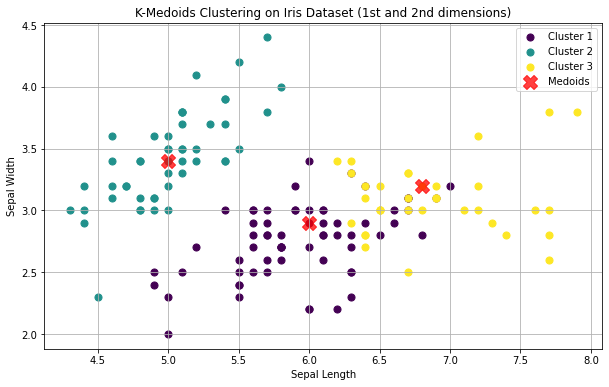

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import datasets
# from pyclustering.cluster.kmedians import kmedians
# from pyclustering.utils.metric import distance_metric, type_metric

# 加载鸢尾花数据集
iris = datasets.load_iris()
data = iris.data

start_time = time.time()

# 设定聚类的数量
k = 3

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medoids_indices = np.random.choice(len(data), k, replace=False)
kmedoids_instance = kmedoids(data, initial_medoids_indices)

# 进行聚类
kmedoids_instance.process()

# 获取聚类结果
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"running time: {elapsed_time}s")

medoids_array = np.array(medoids)

# 展示聚类的rand score
print('adjusted_rand_score:', adjusted_rand_score(transfer_to_index_list(clusters), y))

# 设置颜色映射
cmap = plt.get_cmap('viridis')

# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = data[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(data[medoids_array][:, 0], data[medoids_array][:, 1], c='red', s=200, alpha=0.75, marker='X', label='Medoids')
plt.title('K-Medoids Clustering on Iris Dataset (1st and 2nd dimensions)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

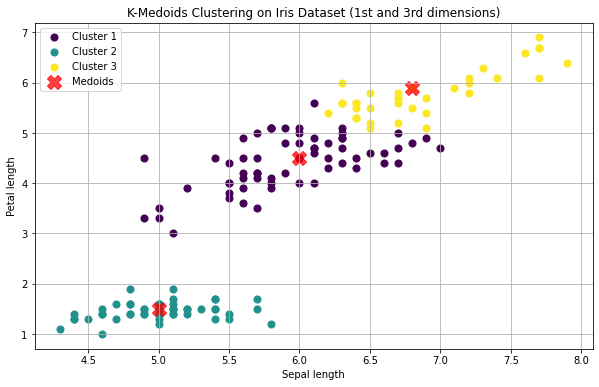

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import datasets
# from pyclustering.cluster.kmedians import kmedians
# from pyclustering.utils.metric import distance_metric, type_metric

# 加载鸢尾花数据集
iris = datasets.load_iris()
data = iris.data

# 设定聚类的数量
k = 3

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medoids_indices = np.random.choice(len(data), k, replace=False)
kmedoids_instance = kmedoids(data, initial_medoids_indices)

# 进行聚类
kmedoids_instance.process()

# 获取聚类结果
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
medoids_array = np.array(medoids)

# 设置颜色映射
cmap = plt.get_cmap('viridis')

# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = data[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 2], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(data[medoids_array][:, 0], data[medoids_array][:, 2], c='red', s=200, alpha=0.75, marker='X', label='Medoids')
plt.title('K-Medoids Clustering on Iris Dataset (1st and 3rd dimensions)')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import pandas as pd

y_twodiamonds = pd.read_csv('../Datasets/TwoDiamonds.csv', usecols=['Class'])
y_twodiamonds = np.array(y_twodiamonds).flatten()

running time: 3.9827558994293213s
adjusted_rand_score: 1.0


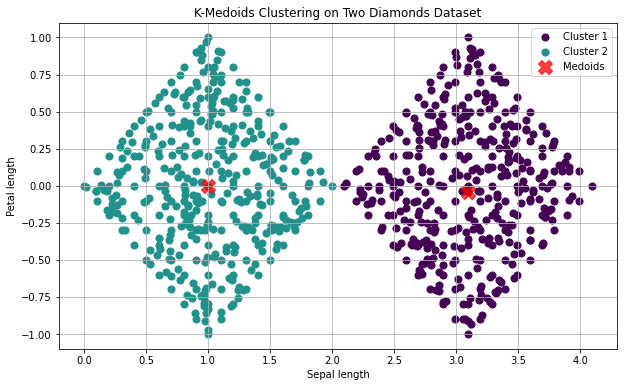

In [9]:
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
# Load list of points for cluster analysis.
sample = np.array(read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS))

start_time = time.time()

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medoids_indices = np.random.choice(len(sample), 2, replace=False)
kmedoids_instance = kmedoids(sample, initial_medoids_indices)

# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"running time: {elapsed_time}s")

medoids_array = np.array(medoids)

# 展示聚类的rand score
print('adjusted_rand_score:', adjusted_rand_score(transfer_to_index_list(clusters), y_twodiamonds))

# 设置颜色映射
cmap = plt.get_cmap('viridis')
# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = sample[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(sample[medoids_array][:, 0], sample[medoids_array][:, 1], c='red', s=200, alpha=0.75, marker='X', label='Medoids')
plt.title('K-Medoids Clustering on Two Diamonds Dataset')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.grid(True)
plt.show()
# # Visualize clustering results.
# visualizer = cluster_visualizer()
# visualizer.append_clusters(clusters, sample)
# visualizer.append_cluster(initial_medians, marker='*', markersize=10)
# visualizer.append_cluster(medians, marker='*', markersize=10)
# visualizer.show()

In [10]:
from sklearn.datasets import make_blobs

def get_blobs_with_outlier():
    X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0)
    np.random.seed(42)  # 确保生成的离群值是可重复的
    n_outliers = 100
    outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))
    outlier_labels = -1 * np.ones((n_outliers,))
    X = np.vstack([X, outliers])
    y = np.concatenate([y, outlier_labels])
    return (X, y)

get_blobs_with_outlier()

(array([[-1.09510311,  2.76883068],
        [ 1.54632313,  4.212973  ],
        [-1.51086098,  3.02795241],
        ...,
        [-3.21940418, -3.01580851],
        [ 4.51911358,  7.9422052 ],
        [ 7.74172849,  5.59751092]]),
 array([ 2.,  0.,  2., ..., -1., -1., -1.]))

running time: 18.565382957458496s
adjusted_rand_score: 0.8365622779422357


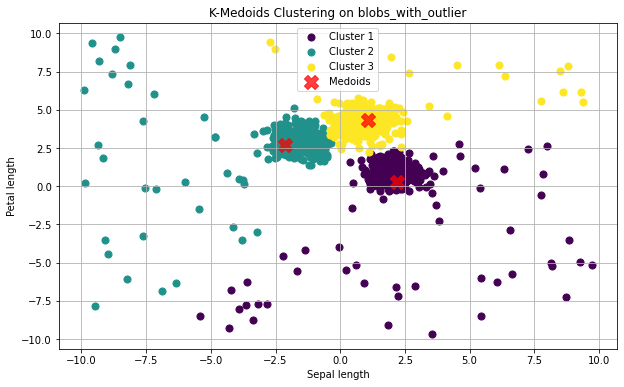

In [11]:
blobs = get_blobs_with_outlier()[0]
blobs_class = get_blobs_with_outlier()[1]

start_time = time.time()

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medoids_indices = np.random.choice(len(blobs), 3, replace=False)
kmedoids_instance = kmedoids(blobs, initial_medoids_indices)
# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"running time: {elapsed_time}s")

medoids_array = np.array(medoids)

# 展示聚类的rand score
print('adjusted_rand_score:', adjusted_rand_score(transfer_to_index_list(clusters), blobs_class))

# 设置颜色映射
cmap = plt.get_cmap('viridis')
# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = blobs[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(blobs[medoids_array][:, 0], blobs[medoids_array][:, 1], c='red', s=200, alpha=0.75, marker='X', label='Medoids')
plt.title('K-Medoids Clustering on blobs_with_outlier')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
def get_blobs():
    X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0) 
    return (X, y)

running time: 18.46216917037964s
adjusted_rand_score: 0.9940030000150241


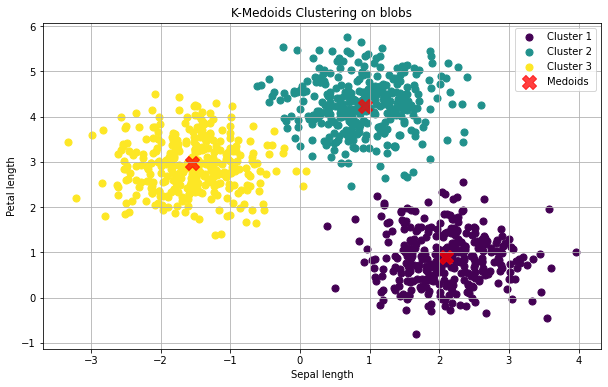

In [13]:
blobs = get_blobs()[0]
blobs_class = get_blobs()[1]

start_time = time.time()

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medoids_indices = np.random.choice(len(blobs), 3, replace=False)
kmedoids_instance = kmedoids(blobs, initial_medoids_indices)
# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"running time: {elapsed_time}s")

medoids_array = np.array(medoids)

# 展示聚类的rand score
print('adjusted_rand_score:', adjusted_rand_score(transfer_to_index_list(clusters), blobs_class))

# 设置颜色映射
cmap = plt.get_cmap('viridis')
# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = blobs[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(blobs[medoids_array][:, 0], blobs[medoids_array][:, 1], c='red', s=200, alpha=0.75, marker='X', label='Medoids')
plt.title('K-Medoids Clustering on blobs')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import pandas as pd

y_engytime = pd.read_csv('../Datasets/EngyTime.csv', usecols=['Class'])
y_engytime = np.array(y_engytime).flatten()

X = pd.read_csv('../Datasets/EngyTime.csv', usecols=['X1', 'X2'])
X = np.array(X)
X

array([[ 1.388261,  2.076096],
       [ 2.177247,  3.102304],
       [ 0.378645,  5.30761 ],
       ...,
       [ 1.078797,  1.526153],
       [ 1.974889, -0.649343],
       [-0.127192, -0.763974]])

running time: 105.8626401424408s
adjusted_rand_score: 0.8194760015989854


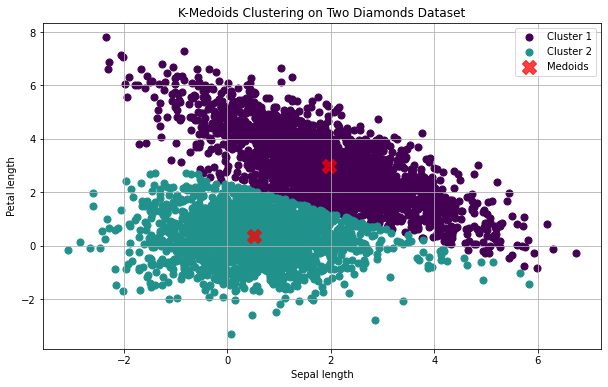

In [15]:
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
# Load list of points for cluster analysis.
sample = pd.read_csv('../Datasets/EngyTime.csv', usecols=['X1', 'X2'])
sample = np.array(sample)

start_time = time.time()

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medoids_indices = np.random.choice(len(sample), 2, replace=False)
kmedoids_instance = kmedoids(sample, initial_medoids_indices)

# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"running time: {elapsed_time}s")

medoids_array = np.array(medoids)

# 展示聚类的rand score
print('adjusted_rand_score:', adjusted_rand_score(transfer_to_index_list(clusters), y_engytime))

# 设置颜色映射
cmap = plt.get_cmap('viridis')
# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = sample[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(sample[medoids_array][:, 0], sample[medoids_array][:, 1], c='red', s=200, alpha=0.75, marker='X', label='Medoids')
plt.title('K-Medoids Clustering on Two Diamonds Dataset')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.grid(True)
plt.show()
# # Visualize clustering results.
# visualizer = cluster_visualizer()
# visualizer.append_clusters(clusters, sample)
# visualizer.append_cluster(initial_medians, marker='*', markersize=10)
# visualizer.append_cluster(medians, marker='*', markersize=10)
# visualizer.show()

adjusted_rand_score: 0.8194760015989854


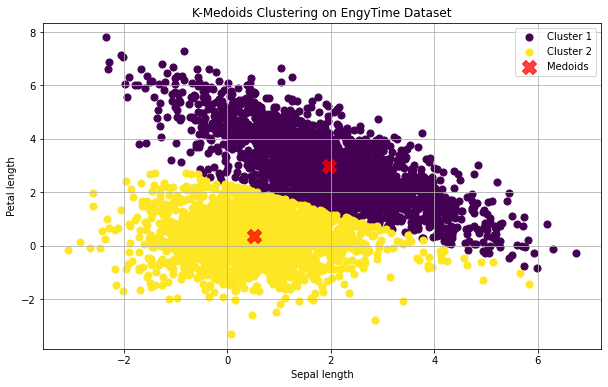

In [10]:
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
# Load list of points for cluster analysis.
sample = pd.read_csv('../Datasets/EngyTime.csv', usecols=['X1', 'X2'])
sample = np.array(sample)

k = 2

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medoids_indices = np.random.choice(len(sample), k, replace=False)
kmedoids_instance = kmedoids(sample, initial_medoids_indices)

# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

medoids_array = np.array(medoids)

# 展示聚类的rand score
print('adjusted_rand_score:', adjusted_rand_score(transfer_to_index_list(clusters), y_engytime))

# 设置颜色映射
cmap = plt.get_cmap('viridis')
# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = sample[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(sample[medoids_array][:, 0], sample[medoids_array][:, 1], c='red', s=200, alpha=0.75, marker='X', label='Medoids')
plt.title('K-Medoids Clustering on EngyTime Dataset')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.grid(True)
plt.show()
# # Visualize clustering results.
# visualizer = cluster_visualizer()
# visualizer.append_clusters(clusters, sample)
# visualizer.append_cluster(initial_medians, marker='*', markersize=10)
# visualizer.append_cluster(medians, marker='*', markersize=10)
# visualizer.show()